In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm.auto import tqdm
from utils import *
from setups import uncertainties, methods_config, metrics_config, variable_config, methods_no_pred_estimate, uncertainties_config, metrics_set_up


exp = "ExpD"

c:\Users\Chris\Anaconda3\envs\logistic\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
simulation_set_up = pd.read_csv(os.path.join("data", exp, "simulation_set_up.csv"))

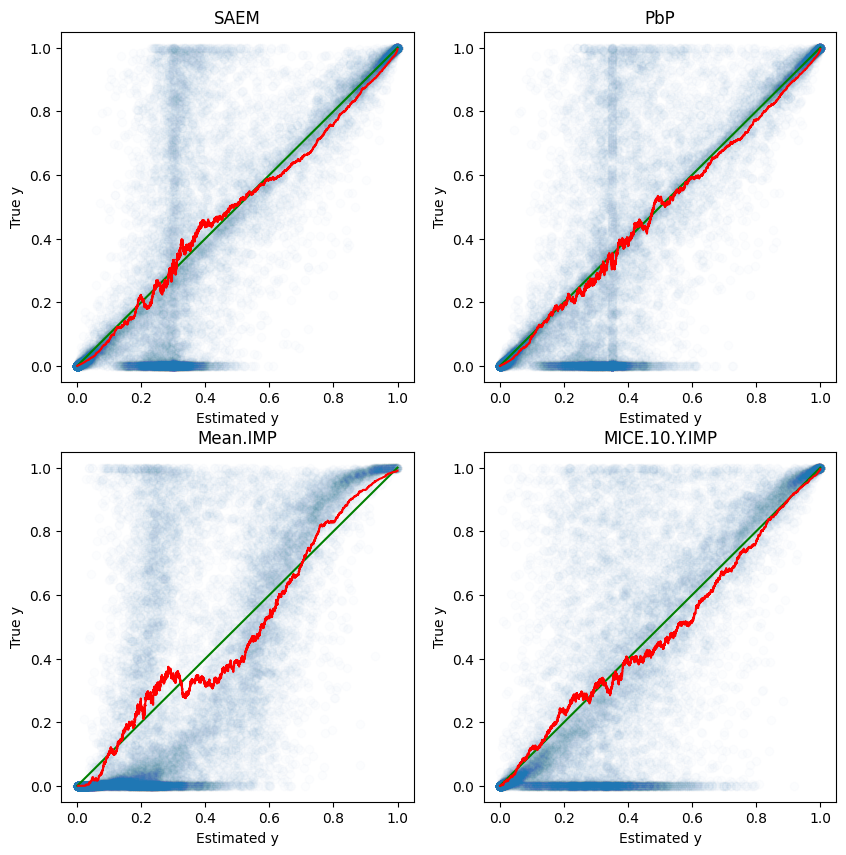

In [34]:

set_up = simulation_set_up["set_up"].values[0]

methods = ["SAEM" , "PbP", "Mean.IMP", "MICE.10.Y.IMP"]
n_train = 50000
vs_true = True

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

true_y = np.load(os.path.join("data", exp, "test_data", f"{set_up}.npz"))["y_probs"]
bayes_y = np.load(os.path.join("data", exp, "bayes_data", f"{set_up}.npz"))["y_probs_bayes"]

for i, method in enumerate(methods):

    row = i // 2
    col = i % 2

    try:
        estimated_y = np.load(os.path.join("data", exp, "pred_data", f"{set_up}_{method}_{n_train}.npz"))["y_probs_pred"].ravel()
    except:
        estimated_y = np.ones_like(true_y) * np.nan

    if vs_true:
        against = true_y
    else:
        against = bayes_y

    axes[row,col].scatter(estimated_y, against, alpha=0.01)
    axes[row,col].plot([0, 1], [0, 1], color="green")

    sort_idx = np.argsort(estimated_y).ravel()
    moving_average = pd.Series(against[sort_idx].ravel()).rolling(window=300).mean()
    axes[row,col].plot(estimated_y[sort_idx], moving_average, color="red")

    if vs_true:
        axes[row,col].set_ylabel("True y")
    else:
        axes[row,col].set_ylabel("Bayes y")
    axes[row,col].set_xlabel("Estimated y")
    axes[row,col].set_title(method)




In [35]:
set_up

'LOG_n115000_d4_corr07_prcNA035_rep0'

Text(0, 0.5, 'True y')

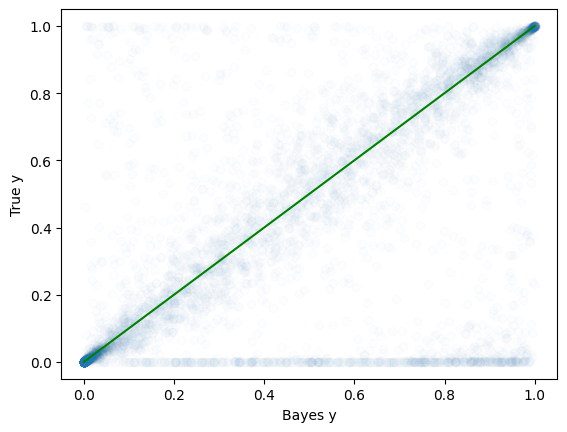

In [36]:
bayes = load_data(set_up, "bayes", exp)["y_probs_bayes"]
test = load_data(set_up, "test", exp)["y_probs"]
test_M = load_data(set_up, "test", exp)["M"]

idx = get_index_pattern(1, test_M)

plt.scatter(bayes[idx], test[idx], alpha=0.01)
plt.plot([0, 1], [0, 1], color="green")
plt.xlabel("Bayes y")
plt.ylabel("True y")

In [45]:
# mean abs error True probs vs estimated

def mean_abs_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_square_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mean_abs_error(estimated_y, true_y)

0.13780433898416572

In [44]:
# mean abs error True probs vs estimated

def mean_abs_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mean_abs_error(bayes, true_y)

0.16023776534586145